### Using Pandas together with SQL

---



In [1]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
pip install -U sql_magic

In [3]:
pip install mysqlclient

     |████████████████████████████████| 92kB 2.7MB/s 
  Created wheel for mysqlclient: filename=mysqlclient-2.0.3-cp37-cp37m-linux_x86_64.whl size=100099 sha256=d1814be18d3c198d97b630d76d713a238936e835154590cde1b8610711f02a20
  Stored in directory: /root/.cache/pip/wheels/75/ca/e8/ad4e7ce3df18bcd91c7d84dd28c7c08db491a2a2360efed363
Successfully built mysqlclient


In [4]:
# Install the SQLAlchemy library if it is not installed
!sudo -H pip3 install -U sqlalchemy

     |████████████████████████████████| 1.5MB 4.4MB/s 
  Found existing installation: SQLAlchemy 1.4.7
    Uninstalling SQLAlchemy-1.4.7:
      Successfully uninstalled SQLAlchemy-1.4.7


### Importing into DataFrames using read_sql

The `read_sql` function of Pandas allows us to create a dataframe directly from a SQL query. To execute the query, we first setup the connection to the database using the SQLAlchemy library.

In [5]:
from sqlalchemy import create_engine

In [ ]:
conn_string_imdb = 'mysql://{user}:{password}@{host}:{port}/{db}'.format(
    user='student', 
    password='dwdstudent2015', 
    host = 'db.ipeirotis.org', 
    port=3306, 
    db='imdb'
)
engine_imdb = create_engine(conn_string_imdb)

#### Retrieve the first 10 lines from the actors table 

In [ ]:
query = '''
SELECT * FROM actors LIMIT 10
'''

In [ ]:
df_actors = pd.read_sql(query, con=engine_imdb)

In [ ]:
df_actors

,id,first_name,last_name,gender
0,2,Michael,'babeepower' Viera,M
1,3,Eloy,'Chincheta',M
2,4,Dieguito,'El Cigala',M
3,5,Antonio,'El de Chipiona',M
4,6,José,'El Francés',M
5,7,Félix,'El Gato',M
6,8,Marcial,'El Jalisco',M
7,9,José,'El Morito',M
8,10,Francisco,'El Niño de la Manola',M
9,11,Víctor,'El Payaso',M


#### Retrieve the number of movies per year

In [ ]:
query = '''
SELECT year, COUNT(*) AS num_movies, COUNT(rating) AS rated_movies
FROM movies 
GROUP BY year
ORDER BY year;
'''

In [ ]:
df_movies = pd.read_sql(query, con=engine_imdb)

In [ ]:
df_movies.head(5)

,year,num_movies,rated_movies
0,1888,2,0
1,1890,3,1
2,1891,6,6
3,1892,9,9
4,1893,2,1


Let's try to plot the results.

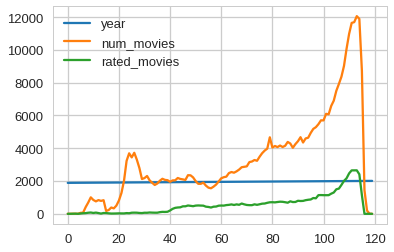

In [ ]:
df_movies.plot()

We have a couple of issues. We also plotted the year as a line, and we do not have it as the label of the x-axis. For that, we need to convert the year into a proper datetime variable, and then make it the index for the dataframe.

In [ ]:
df_movies['year'] = pd.to_datetime(df_movies['year'], format='%Y')
df_movies2 = df_movies.set_index('year')

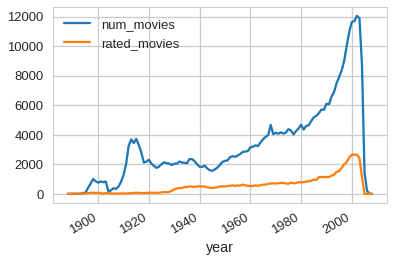

In [ ]:
df_movies2.plot()

### Exercise

* Connect to the Facebook database, and use the `MemberSince` variable from the `Profiles` table to plot the growth of Facebook users.
* (_Learn something new_) Use the [cumsum()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.cumsum.html) function of Pandas and plot the total number of registered users over time.

In [ ]:
# your code here

### Further Examples with SQL and Pandas

Now let's run a query to get the political views of Facebook users, broken down by gender.

In [ ]:
conn_string_fb = 'mysql://{user}:{password}@{host}:{port}/{db}'.format(
    user='student', 
    password='dwdstudent2015', 
    host = 'db.ipeirotis.org', 
    port=3306,  
    db='facebook'
)
engine_fb = create_engine(conn_string_fb)

In [ ]:
describeprofiles='''
describe Profiles
'''
df=pd.read_sql(describeprofiles,con=engine_fb)
df

,Field,Type,Null,Key,Default,Extra
0,ProfileID,int(11),NO,PRI,None,
1,Name,varchar(255),YES,,None,
2,MemberSince,datetime,YES,,None,
3,LastUpdate,datetime,YES,,None,
4,School,varchar(255),YES,,None,
5,Status,varchar(255),YES,,None,
6,Sex,varchar(255),YES,,None,
7,Birthday,datetime,YES,,None,
8,AIM,varchar(255),YES,,None,
9,Website,varchar(255),YES,,None,


In [ ]:
polviews_by_gender = '''
SELECT Sex, PoliticalViews, COUNT(*) AS cnt 
FROM Profiles 
WHERE Sex IS NOT NULL AND PoliticalViews IS NOT NULL 
GROUP BY Sex, PoliticalViews  
ORDER BY  PoliticalViews, Sex
'''


And let's get the dataframe:

In [ ]:
df = pd.read_sql(polviews_by_gender, con=engine_fb)
df

,Sex,PoliticalViews,cnt
0,Female,Apathetic,309
1,Male,Apathetic,462
2,Female,Conservative,428
3,Male,Conservative,474
4,Female,Liberal,4054
5,Male,Liberal,2196
6,Female,Libertarian,113
7,Male,Libertarian,196
8,Female,Moderate,1444
9,Male,Moderate,1379


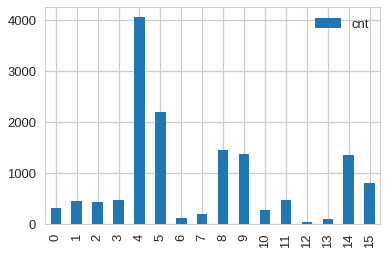

In [ ]:
# Let's plot this!
# Bleh, this is really fugly...
# Remember that the index of the dataframe becomes the default x-axis
df.plot(kind='bar')

In [ ]:
# Pivot, baby!
# Now the index contains the Political Views, which will be our x-axis
dfp = df.pivot_table(index='PoliticalViews', columns='Sex', values='cnt')
dfp

Sex,Female,Male
PoliticalViews,,
Apathetic,309,462
Conservative,428,474
Liberal,4054,2196
Libertarian,113,196
Moderate,1444,1379
Other,280,482
Very Conservative,38,107
Very Liberal,1362,813


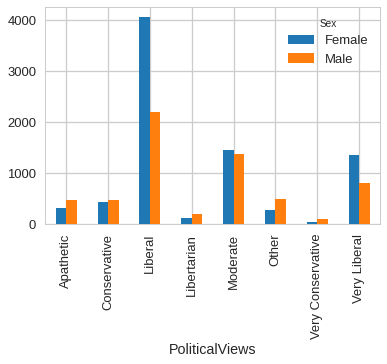

In [ ]:
dfp.plot(kind='bar')

In [ ]:
# Let's normalize the columns, as we have more females than males, and it seems that there are always more women
dfp = dfp / dfp.sum()
dfp

Sex,Female,Male
PoliticalViews,,
Apathetic,0.038490,0.075626
Conservative,0.053313,0.077590
Liberal,0.504983,0.359470
Libertarian,0.014076,0.032084
Moderate,0.179870,0.225733
Other,0.034878,0.078900
Very Conservative,0.004733,0.017515
Very Liberal,0.169656,0.133082


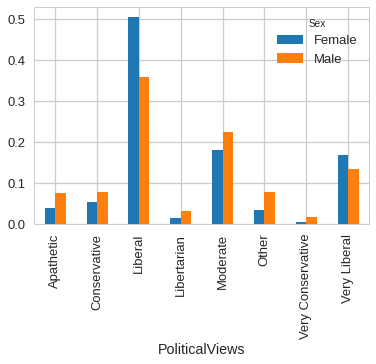

In [ ]:
dfp.plot(kind='bar')

In [ ]:
# OK, now let's try to re-order the list of results according to the logical structure
neworder = ['Very Liberal', 'Liberal', 'Moderate', 'Conservative', 'Very Conservative', 'Libertarian', 'Apathetic', 'Other']
newindex = sorted(dfp.index, key=lambda x: neworder.index(x))
dfp = dfp.reindex(newindex)
dfp

Sex,Female,Male
PoliticalViews,,
Very Liberal,0.169656,0.133082
Liberal,0.504983,0.359470
Moderate,0.179870,0.225733
Conservative,0.053313,0.077590
Very Conservative,0.004733,0.017515
Libertarian,0.014076,0.032084
Apathetic,0.038490,0.075626
Other,0.034878,0.078900


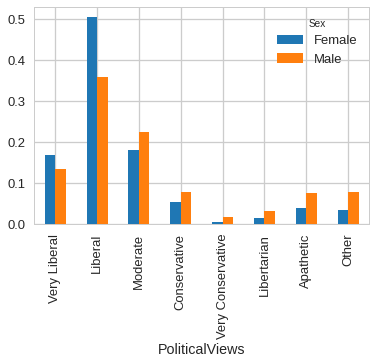

In [ ]:
dfp.plot(kind='bar')

### Facebook, Favorite Books, and Political views

In [ ]:
books = '''
SELECT F.FavoriteBook, P.PoliticalViews, COUNT(*) AS cnt 
FROM Profiles P JOIN FavoriteBooks F ON F.ProfileID = P.ProfileId  
WHERE PoliticalViews IS NOT NULL AND F.FavoriteBook IS NOT NULL 
      AND (PoliticalViews = 'Liberal' OR PoliticalViews = 'Conservative')
GROUP BY F.FavoriteBook, P.PoliticalViews
'''

books = '''
SELECT F.FavoriteBook, P.PoliticalViews, COUNT(*) AS cnt 
FROM Profiles P JOIN FavoriteBooks F ON F.ProfileID = P.ProfileId  
WHERE PoliticalViews IS NOT NULL AND F.FavoriteBook IS NOT NULL 
      AND (PoliticalViews = 'Liberal' OR PoliticalViews = 'Conservative')
GROUP BY F.FavoriteBook, P.PoliticalViews
''' ---> **This doesn't seem to work on my end**

In [ ]:
describebooks='''
describe FavoriteBooks
'''
df1=pd.read_sql(describebooks,con=engine_fb)
df1

,Field,Type,Null,Key,Default,Extra
0,ProfileID,int(11),NO,MUL,None,
1,Book,varchar(255),YES,,None,


In [ ]:
showtable='''
show tables
'''
df2=pd.read_sql(showtable,con=engine_fb)
df2

,Tables_in_facebook
0,Concentration
1,FavoriteBooks
2,FavoriteMovies
3,FavoriteMusic
4,FavoriteTVShows
5,Hobbies
6,LookingFor
7,Orientation
8,Profiles
9,Relationship


In [ ]:
books = '''
SELECT Book, PoliticalViews, COUNT(*) AS cnt 
FROM Profiles P JOIN FavoriteBooks F ON F.ProfileID = P.ProfileId  
WHERE PoliticalViews IS NOT NULL AND Book IS NOT NULL 
      AND (PoliticalViews = 'Liberal' OR PoliticalViews = 'Conservative')
GROUP BY Book, PoliticalViews
'''

books = '''
SELECT Book
FROM FavoriteBooks
WHERE Book IS NOT NULL
ORDER BY Book
'''

books = '''
SELECT PoliticalViews, COUNT(*) AS cnt
FROM Profiles 
WHERE PoliticalViews IS NOT NULL
GROUP BY PoliticalViews
'''

In [ ]:
df_books = pd.read_sql(books, con=engine_fb)
df_books.head(1000)

,Book,PoliticalViews,cnt
0,Mansfield Park,Conservative,2
1,Memoirs Of A Geisha,Conservative,17
2,Harry Potter All,Conservative,1
3,A Gesture Life,Conservative,1
4,Queen Of Camelot,Conservative,1
...,...,...,...
995,Candide,Conservative,5
996,The Da Vinci Code,Conservative,17
997,Spider Man,Liberal,1
998,Powers,Liberal,1


In [ ]:
dfp = df_books.pivot_table(index='Book', columns='PoliticalViews', values='cnt')
dfp.head(10)

PoliticalViews,Conservative,Liberal
Book,,
000 In College Loans And A Meaningless Diploma Quot,NaN,1.0
000 Leagues Under The Sea,NaN,2.0
000 Things To Be Happy About,NaN,1.0
1,NaN,1.0
1 Bachelorette,NaN,1.0
10 Otherland 11 Wheel Of Time Series Ummm There Are More,NaN,1.0
10 Thousand Sorrows,NaN,1.0
100 Anos De Soledad,NaN,1.0
100 People Who Are Screwing Up America,1.0,NaN


In [ ]:
# If we compute the sums, we will see that we have very different 
# number of likes per political view, due to imbalance in the population
dfp.sum()

PoliticalViews
Conservative     3318.0
Liberal         31253.0
dtype: float64

In [ ]:
# Normalize the values, so that each column sums up to 1.0
dfp = dfp / dfp.sum()
dfp.head(20)

PoliticalViews,Conservative,Liberal
Book,,
000 In College Loans And A Meaningless Diploma Quot,NaN,0.000032
000 Leagues Under The Sea,NaN,0.000064
000 Things To Be Happy About,NaN,0.000032
1,NaN,0.000032
1 Bachelorette,NaN,0.000032
10 Otherland 11 Wheel Of Time Series Ummm There Are More,NaN,0.000032
10 Thousand Sorrows,NaN,0.000032
100 Anos De Soledad,NaN,0.000032
100 People Who Are Screwing Up America,0.000301,NaN


In [ ]:
dfp["Liberal_To_Conservative"] = dfp["Liberal"]  / dfp["Conservative"] 
dfp["Conservative_To_Liberal"] = dfp["Conservative"]  / dfp["Liberal"] 

In [ ]:
liberal_books = dfp[["Liberal_To_Conservative"]].sort_values("Liberal_To_Conservative", ascending=False).head(10)
liberal_books

PoliticalViews,Liberal_To_Conservative
Book,
The Kite Runner,6.582280
The Hours,6.157617
The Bluest Eye,5.414456
Love In The Time Of Cholera,5.308290
The Phantom Tollbooth,4.989793
The Unbearable Lightness Of Being,4.936710
Angels In America,4.883627
Middlesex,4.724378
Beloved,4.565130


In [ ]:
conservative_books = dfp[["Conservative_To_Liberal"]].sort_values("Conservative_To_Liberal", ascending=False).head(10)
conservative_books

PoliticalViews,Conservative_To_Liberal
Book,
When Genius Failed,37.676914
Liar S Poker,33.909222
Exodus,18.838457
Anything By Nicholas Sparks,18.838457
Juiced,18.838457
French Women Don T Get Fat,18.838457
Fiasco,18.838457
Anything Dave Barry,18.838457
The Hardy Boys,18.838457


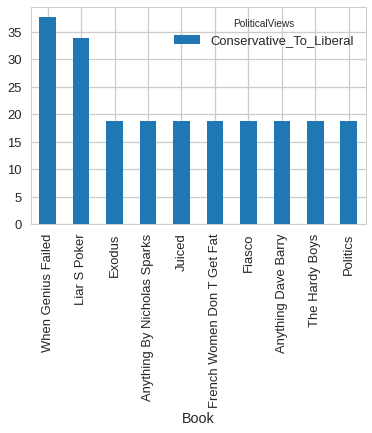

In [ ]:
conservative_books.plot(kind='bar')

### Inserting Data in a Database using Pandas

In [ ]:
###!curl http://people.stern.nyu.edu/nwhite/DealingiwthDataSpring2021/data/restaurant.csv.gz -o restaurant.csv.gz ###This didn't work on my end!

In [ ]:
!wget http://people.stern.nyu.edu/nwhite/DealingwithDataSpring2021/data/restaurant.csv

--2021-04-25 16:18:09--  http://people.stern.nyu.edu/nwhite/DealingwithDataSpring2021/data/restaurant.csv
Resolving people.stern.nyu.edu (people.stern.nyu.edu)... 128.122.130.142
Connecting to people.stern.nyu.edu (people.stern.nyu.edu)|128.122.130.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168508690 (161M) [text/csv]
Saving to: ‘restaurant.csv.1’

restaurant.csv.1    100%[===================>] 160.70M  4.61MB/s    in 36s     

2021-04-25 16:18:45 (4.45 MB/s) - ‘restaurant.csv.1’ saved [168508690/168508690]



In [ ]:
# Read the CSV file
restaurants = pd.read_csv('/content/restaurant.csv', encoding="utf-8", dtype="unicode")

In [ ]:
# Usual bookkeeping regarding datatypes
restaurants["GRADE DATE"] = pd.to_datetime(restaurants["GRADE DATE"], format="%m/%d/%Y")
restaurants["RECORD DATE"] = pd.to_datetime(restaurants["RECORD DATE"], format="%m/%d/%Y")
restaurants["INSPECTION DATE"] = pd.to_datetime(restaurants["INSPECTION DATE"], format="%m/%d/%Y")
restaurants["SCORE"] = pd.to_numeric(restaurants["SCORE"])
restaurants["BORO"] =  pd.Categorical(restaurants["BORO"], ordered=False)
restaurants["GRADE"] =  pd.Categorical(restaurants["GRADE"], categories = ['A', 'B', 'C'], ordered=True)
restaurants["VIOLATION CODE"] =  pd.Categorical(restaurants["VIOLATION CODE"], ordered=False)
restaurants["CRITICAL FLAG"] =  pd.Categorical(restaurants["CRITICAL FLAG"], ordered=False)
restaurants["ACTION"] =  pd.Categorical(restaurants["ACTION"], ordered=False)
restaurants["CUISINE DESCRIPTION"] =  pd.Categorical(restaurants["CUISINE DESCRIPTION"], ordered=False)

In [ ]:
restaurants.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,40638039,LEGENDS BAR & GRILL,Queens,7104,35 AVENUE,11372,7188999553,American,2019-03-25,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,10.0,A,2019-03-25,2019-10-26,Cycle Inspection / Initial Inspection,40.750719368488,-73.894733598464,403,25,029100,4029524,4012710101,QN28
1,40577241,ROYAL BAKERY & ROTI SHOP,Brooklyn,618,NOSTRAND AVENUE,11216,7186040200,Caribbean,2017-02-27,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,9.0,A,2017-02-27,2019-10-26,Cycle Inspection / Initial Inspection,40.677323126922,-73.949811619041,308,36,031500,3030003,3012060041,BK61
2,50057781,BENS COOKIES,Manhattan,822,BROADWAY,10003,5164106172,Café/Coffee/Tea,2016-12-20,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,8.0,A,2016-12-20,2019-10-26,Pre-permit (Operational) / Initial Inspection,40.733033400166,-73.991138128793,102,02,006100,1009001,1005570017,MN23
3,40542546,CUCCIOS BAKERY,Brooklyn,320,AVENUE X,11223,7183361944,Bakery,2017-12-19,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,23.0,NaN,NaT,2019-10-26,Cycle Inspection / Initial Inspection,40.590414238221,-73.971289470632,315,47,037402,3195080,3071940010,BK26
4,41383250,OSAKA JAPANESE FUSION,Queens,2524,BROADWAY,11106,7187772662,Japanese,2016-10-05,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,11.0,A,2016-10-05,2019-10-26,Cycle Inspection / Re-inspection,40.76329423995,-73.928209921765,401,22,005300,4007160,4005800026,QN70


In [ ]:
# Connect to the MySQL, but without selecting a database
conn_string = 'mysql://{user}:{password}@{host}:{port}/'.format(
    user='DealingS21', password='DealingS21!!', 
    host = 'bigdata.stern.nyu.edu', port=3306)
engine = create_engine(conn_string)

In [ ]:
# Create the database where we want to store the data
# Do not worry about the Warning if the database already exists
engine.execute('CREATE DATABASE IF NOT EXISTS nyc_restaurant_inspections')
engine.execute('USE nyc_restaurant_inspections')

In [ ]:
# We drop the table if it is already there
engine.execute('DROP TABLE IF EXISTS inspections')
# Store the dataframe as a SQL table, using the to_sql command
restaurants.to_sql(name='inspections', if_exists='replace', index=False, con=engine, chunksize=1000)

In [ ]:
# And then we can just retrieve it from the database
df = pd.read_sql("SELECT * FROM inspections LIMIT 100", con=engine)
df.head(5)

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,40638039,LEGENDS BAR & GRILL,Queens,7104,35 AVENUE,11372,7188999553,American,2019-03-25,Violations were cited in the following area(s).,06D,"Food contact surface not properly washed, rins...",Y,10.0,A,2019-03-25,2019-10-26,Cycle Inspection / Initial Inspection,40.750719368488,-73.894733598464,403,25,029100,4029524,4012710101,QN28
1,40577241,ROYAL BAKERY & ROTI SHOP,Brooklyn,618,NOSTRAND AVENUE,11216,7186040200,Caribbean,2017-02-27,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,9.0,A,2017-02-27,2019-10-26,Cycle Inspection / Initial Inspection,40.677323126922,-73.949811619041,308,36,031500,3030003,3012060041,BK61
2,50057781,BENS COOKIES,Manhattan,822,BROADWAY,10003,5164106172,Café/Coffee/Tea,2016-12-20,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,8.0,A,2016-12-20,2019-10-26,Pre-permit (Operational) / Initial Inspection,40.733033400166,-73.991138128793,102,02,006100,1009001,1005570017,MN23
3,40542546,CUCCIOS BAKERY,Brooklyn,320,AVENUE X,11223,7183361944,Bakery,2017-12-19,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,N,23.0,None,NaT,2019-10-26,Cycle Inspection / Initial Inspection,40.590414238221,-73.971289470632,315,47,037402,3195080,3071940010,BK26
4,41383250,OSAKA JAPANESE FUSION,Queens,2524,BROADWAY,11106,7187772662,Japanese,2016-10-05,Violations were cited in the following area(s).,08A,Facility not vermin proof. Harborage or condit...,N,11.0,A,2016-10-05,2019-10-26,Cycle Inspection / Re-inspection,40.76329423995,-73.928209921765,401,22,005300,4007160,4005800026,QN70


In [ ]:
### How many rows do we have?
df1= pd.read_sql('select count(*) from inspections1000',con=engine)
df1

,count(*)
0,1000


In [ ]:
### How about in the full table? 
df1=pd.read_sql('select count(*) from inspections',con=engine)
df1

,count(*)
0,394724


In class **exercise**

In [ ]:
# create a small data frame
data=[[1,2],[3,4],[5,6]]
mydf=pd.DataFrame(data,columns=['a','b'])
mydf

,a,b
0,1,2
1,3,4
2,5,6


In [ ]:
# Your code here (Change the user and password)
# Connect to the MySQL, but without selecting a database
# I will use team 10's userid and password for testing
#

conn_string = 'mysql://{user}:{password}@{host}:{port}/'.format(
    user='DealingS21GB10', password='DealingS21GB10!!', 
    host = 'bigdata.stern.nyu.edu', port=3306)
engine = create_engine(conn_string)

engine.execute("USE DealingS21GB10")

engine.execute("SHOW TABLES")
engine.execute("DROP TABLE IF EXISTS  nhw1")
# create a table for the data frame

mydf.to_sql(name='nhw1', index=False, con=engine, chunksize=500)

engine.execute("SHOW TABLES")

In [ ]:
engine.execute("USE DealingS21GB10")
df = pd.read_sql("SELECT * FROM nhw1 LIMIT 100", con=engine)
df.head(5)
res=pd.read_sql("SHOW TABLES", con=engine)
res
engine.execute("DROP TABLE nhw1")

In [ ]:
df

,a,b
0,1,2
1,3,4
2,5,6


In [ ]:
res

,Tables_in_DealingS21GB10
0,nhw1


In [ ]:
# Your code here (Change the user and password)
# Connect to the MySQL, but without selecting a database
# I will use team 10's userid and password for testing
#

conn_string = 'mysql://{user}:{password}@{host}:{port}/'.format(
    user='DealingS21GB5', password='DealingS21GB5!!', 
    host = 'bigdata.stern.nyu.edu', port=3306)
engine = create_engine(conn_string)

engine.execute("USE DealingS21GB5")

engine.execute("SHOW TABLES")
engine.execute("DROP TABLE IF EXISTS  rsc468")
# create a table for the data frame

mydf.to_sql(name='rsc468', index=False, con=engine, chunksize=500)

engine.execute("SHOW TABLES")

In [ ]:
engine.execute("USE DealingS21GB5")
df = pd.read_sql("SELECT * FROM rsc468 LIMIT 100", con=engine)
df.head(5)
res=pd.read_sql("SHOW TABLES", con=engine)
res
engine.execute("DROP TABLE rsc468")

In [ ]:
res

,Tables_in_DealingS21GB5
0,rsc468
1,team5


In [ ]:
!wget https://github.com/lcqsigi/big-data2/archive/refs/heads/main.zip

--2021-04-26 01:44:13--  https://github.com/lcqsigi/big-data2/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/lcqsigi/big-data2/zip/refs/heads/main [following]
--2021-04-26 01:44:13--  https://codeload.github.com/lcqsigi/big-data2/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [ <=>                ]  18.48M  94.8MB/s    in 0.2s    

2021-04-26 01:44:14 (94.8 MB/s) - ‘main.zip’ saved [19376203]



In [ ]:
!unzip main.zip

total 18928
drwxr-xr-x 1 root root     4096 Apr 21 13:39 sample_data
-rw-r--r-- 1 root root 19376203 Apr 26 01:44 main.zip


In [ ]:
!cp big-data2-main/file.tar.bz2 .

In [ ]:
!ls -ltr

total 643516
-rw-r--r-- 1 1000 users 131879567 Sep 20  2019 Amazon_Unlocked_Mobile.csv
-rw-r--r-- 1 root root  168508690 Apr 14 15:03 restaurant.csv.1
-rw-r--r-- 1 root root  168508690 Apr 14 15:03 restaurant.csv
drwxr-xr-x 1 root root       4096 Apr 21 13:39 sample_data
drwxr-xr-x 2 root root       4096 Apr 25 11:56 big-data2-main
-rw-r--r-- 1 root root   19376203 Apr 25 16:15 main.zip
-rw-r--r-- 1 root root  131891200 Apr 25 16:16 file.tar
-rw-r--r-- 1 root root   19376203 Apr 25 16:21 main.zip.1
-rw-r--r-- 1 root root   19399520 Apr 25 16:45 file.tar.bz2


In [ ]:
!bunzip2 file.tar.bz2

bunzip2: Output file file.tar already exists.


In [ ]:
!tar -xvf file.tar

Amazon_Unlocked_Mobile.csv


In [ ]:
!vi Amazon_Unlocked_Mobile.csv

/bin/bash: vi: command not found


In [ ]:
reviews = pd.read_csv('/content/Amazon_Unlocked_Mobile.csv', encoding="utf-8", dtype="unicode")

In [ ]:
reviews.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0


In [ ]:
reviews2=reviews.rename({'Product Name': 'Product_Name', 'Brand Name': 'Brand_Name', 'Review Votes': 'Review_Votes'}, axis=1)

In [ ]:
reviews3=reviews2.head(430)
len(reviews3)

430

In [6]:
# Connect to the MySQL, but without selecting a database
conn_string = 'mysql://{user}:{password}@{host}:{port}/'.format(
    user='DealingS21GB5', password='DealingS21GB5!!', 
    host = 'bigdata.stern.nyu.edu', port=3306,charset='utf8',encoding="cp437", errors='ignore')
engine = create_engine(conn_string)

In [182]:
engine.execute("USE DealingS21GB5")
engine.execute("DROP TABLE IF EXISTS  dir8")
#mydf.to_sql(name='team5', index=False, con=engine, chunksize=500)

#reviews3.to_sql(name='team5', if_exists='replace', index=False, con=engine)

#engine.execute("SHOW TABLES")

In [189]:
engine.execute("USE DealingS21GB5")
df = pd.read_sql("SELECT * FROM dir8 LIMIT 50000", con=engine)
df.tail(10)
#len(df)
#res=pd.read_sql("SHOW TABLES", con=engine)
#res=pd.read_sql("DESCRIBE team5", con=engine)
#res
#engine.execute("DROP TABLE rsc468")

,Product_Name,Brand_Name,Price,Rating,Reviews,Review_Votes
49989,Sprint LG LG LS 840 Viper 4G Android LTE Phone...,LG,199.99,5.0,Everything is great with phone. Came exactly t...,0.0
49990,Sprint LG LG LS 840 Viper 4G Android LTE Phone...,LG,199.99,5.0,Great phone. Great sender. Thanks,0.0
49991,Sprint LG LG LS 840 Viper 4G Android LTE Phone...,LG,199.99,2.0,Even though the phone says no contract it stil...,0.0
49992,Sprint LG LG LS 840 Viper 4G Android LTE Phone...,LG,199.99,4.0,I ordered 2 of these phones and they arrived a...,0.0
49993,Sprint LG LG LS 840 Viper 4G Android LTE Phone...,LG,199.99,5.0,Really love my phone. Would not consider repla...,0.0
49994,Sprint LG LG LS 840 Viper 4G Android LTE Phone...,LG,199.99,4.0,He liked it.,0.0
49995,Sprint LG LG LS 840 Viper 4G Android LTE Phone...,LG,199.99,4.0,phone was in a great condition but had to repl...,0.0
49996,Sprint LG LG LS 840 Viper 4G Android LTE Phone...,LG,199.99,5.0,Shipping was fast and had no trouble activatin...,0.0
49997,Sprint LG LG LS 840 Viper 4G Android LTE Phone...,LG,199.99,3.0,Ok phone. Has lte and memory card slot. If tho...,0.0
49998,Sprint LG LG LS 840 Viper 4G Android LTE Phone...,LG,199.99,4.0,The phone was just as described. Fully functio...,0.0


In [ ]:
import re
regex = r"[.]+"
test_str = "dealer said it does not reimburse dealers for loaners or rentals... so why even be a dealership if they make faulty cars and you re on the line to help customers" 
subst = "."
result = re.sub(regex, subst, test_str, 0, re.MULTILINE | re.IGNORECASE)
if result:
    print (result)

dealer said it does not reimburse dealers for loaners or rentals. so why even be a dealership if they make faulty cars and you re on the line to help customers
